In [1]:
# 코드 3-12 로이더 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# 코드 3-13 로이더 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [3]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
# 코드 3-14 데이터 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
# 코드 3-15 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

In [8]:
# 코드 3-16 모델 컴파일하기
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [11]:
# 코드 3-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
# 코드 3-18 모델 훈련하기
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 67us/step - loss: 2.6349 - accuracy: 0.5056 - val_loss: 1.7476 - val_accuracy: 0.6440
Epoch 2/20
7982/7982 [==============================] - 0s 34us/step - loss: 1.4299 - accuracy: 0.7010 - val_loss: 1.2939 - val_accuracy: 0.7210
Epoch 3/20
7982/7982 [==============================] - 0s 28us/step - loss: 1.0552 - accuracy: 0.7711 - val_loss: 1.1122 - val_accuracy: 0.7540
Epoch 4/20
7982/7982 [==============================] - 0s 25us/step - loss: 0.8344 - accuracy: 0.8208 - val_loss: 1.0194 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 0s 36us/step - loss: 0.6726 - accuracy: 0.8591 - val_loss: 0.9994 - val_accuracy: 0.7920
Epoch 6/20
7982/7982 [==============================] - 0s 34us/step - loss: 0.5415 - accuracy: 0.8881 - val_loss: 0.9061 - val_accuracy: 0.8220
Epoch 7/20
7982/7982 [==============================] - 0s 32us/step - loss: 0.439

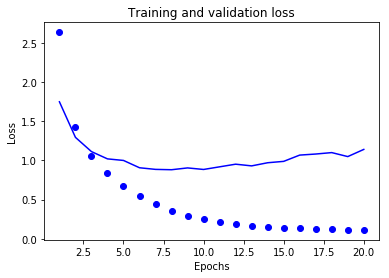

In [14]:
# 코드 3-19 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

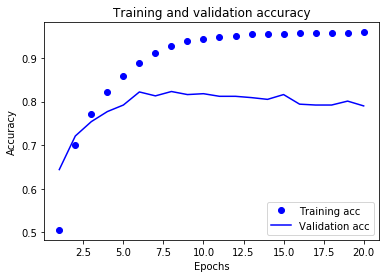

In [19]:
# 코드 3-20 훈련과 검증 정확도 그리기
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [20]:
# 코드 3-21 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 32us/step - loss: 2.6199 - accuracy: 0.5336 - val_loss: 1.7642 - val_accuracy: 0.6380
Epoch 2/9
7982/7982 [==============================] - 0s 24us/step - loss: 1.4508 - accuracy: 0.6943 - val_loss: 1.3315 - val_accuracy: 0.7040
Epoch 3/9
7982/7982 [==============================] - 0s 24us/step - loss: 1.0770 - accuracy: 0.7630 - val_loss: 1.1795 - val_accuracy: 0.7290
Epoch 4/9
7982/7982 [==============================] - 0s 24us/step - loss: 0.8489 - accuracy: 0.8148 - val_loss: 1.0543 - val_accuracy: 0.7790
Epoch 5/9
7982/7982 [==============================] - 0s 25us/step - loss: 0.6731 - accuracy: 0.8577 - val_loss: 0.9856 - val_accuracy: 0.8050
Epoch 6/9
7982/7982 [==============================] - 0s 33us/step - loss: 0.5398 - accuracy: 0.8881 - val_loss: 0.9554 - val_accuracy: 0.8060
Epoch 7/9
7982/7982 [==============================] - 0s 33us/step - loss: 0.4319 - acc

In [21]:
results

[0.9822736608058559, 0.7889581322669983]

In [22]:
# 코드 3-22 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [24]:
# 코드 3-23 정보 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 49us/step - loss: 3.0812 - accuracy: 0.1632 - val_loss: 2.4082 - val_accuracy: 0.5170
Epoch 2/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.9369 - accuracy: 0.5781 - val_loss: 1.6420 - val_accuracy: 0.6140
Epoch 3/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.3961 - accuracy: 0.6341 - val_loss: 1.4201 - val_accuracy: 0.6320
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.1724 - accuracy: 0.6701 - val_loss: 1.3365 - val_accuracy: 0.6760
Epoch 5/20
7982/7982 [==============================] - 1s 96us/step - loss: 1.0256 - accuracy: 0.7216 - val_loss: 1.2827 - val_accuracy: 0.7000
Epoch 6/20
7982/7982 [==============================] - 0s 36us/step - loss: 0.9181 - accuracy: 0.7650 - val_loss: 1.2739 - val_accuracy: 0.7040
Epoch 7/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.828